   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
Axes(0.125,0.653529;0.227941x0.226471)
Axes(0.398529,0.653529;0.227941x0.226471)
Axes(0.672059,0.653529;0.227941x0.226471)
Axes(0.125,0.381765;0.227941x0.226471)
Axes(0.398529,0.381765;0.227941x0.226471)
Axes(0.672059,0.381765;0.227941x0.226471)
Axes(0.125,0.11;0.227941x0.226471)
Axes(0.398529,0.11;0.227941x0.226471)
Axes(0.672059,0.11;0.227941x0.226471)
P-value for asset 0 : 0.33900411305069467
P-value for asset 1 : 0.6373252880751723
P-value for asset 2 : 0.5849466796224406
P-value for asset 3 : 0.42163308008614553
P-value for asset 4 : 0.10320786615909222
P-value for asset 5 : 0.6138151653838292
P-value for asset 6 : 0.2197605392140588
P-value for asset 7 : 0.7607897619965606
P-value for asset 8 : 0.8012239522394833
Axes(0.125,0.653529;0.227941x0.226471)
Axes(0.398529,0.653529;0.227941x0.226471)
Axes(0.672059,0.653529;0.227941x0.226471)
Axes(0.125,0.381765;0.227941x0.226471)
Axes(0.398529,0.381765;0.227941x

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


intercept    0.000636
sigma2       0.000368
dtype: float64 ARIMA model parameters
     lb_stat  lb_pvalue
1   0.000110   0.991624
2   0.000721   0.999639
3   0.005500   0.999892
4   0.009534   0.999989
5   0.009820   0.999999
6   0.009915   1.000000
7   0.010721   1.000000
8   0.011345   1.000000
9   0.014085   1.000000
10  0.015579   1.000000 Ljung-Box test ARIMA 7
intercept    0.002751
sigma2       0.000482
dtype: float64 ARIMA model parameters
     lb_stat  lb_pvalue
1   0.000042   0.994823
2   0.004996   0.997505
3   0.005936   0.999879
4   0.005940   0.999996
5   0.006743   1.000000
6   0.010932   1.000000
7   0.011701   1.000000
8   0.037202   1.000000
9   0.038622   1.000000
10  0.038833   1.000000 Ljung-Box test ARIMA 8
order: 0
AIC: -75.75718687270063
order: 1
AIC: -75.32858315058078
order: 2
AIC: -74.59361226230213
order: 3
AIC: -73.94478069881661
order: 4
AIC: -73.32936804255293
order: 5
AIC: -73.55240598554484
      lb_stat  lb_pvalue
1    0.069327   0.792319
2    0.273073 

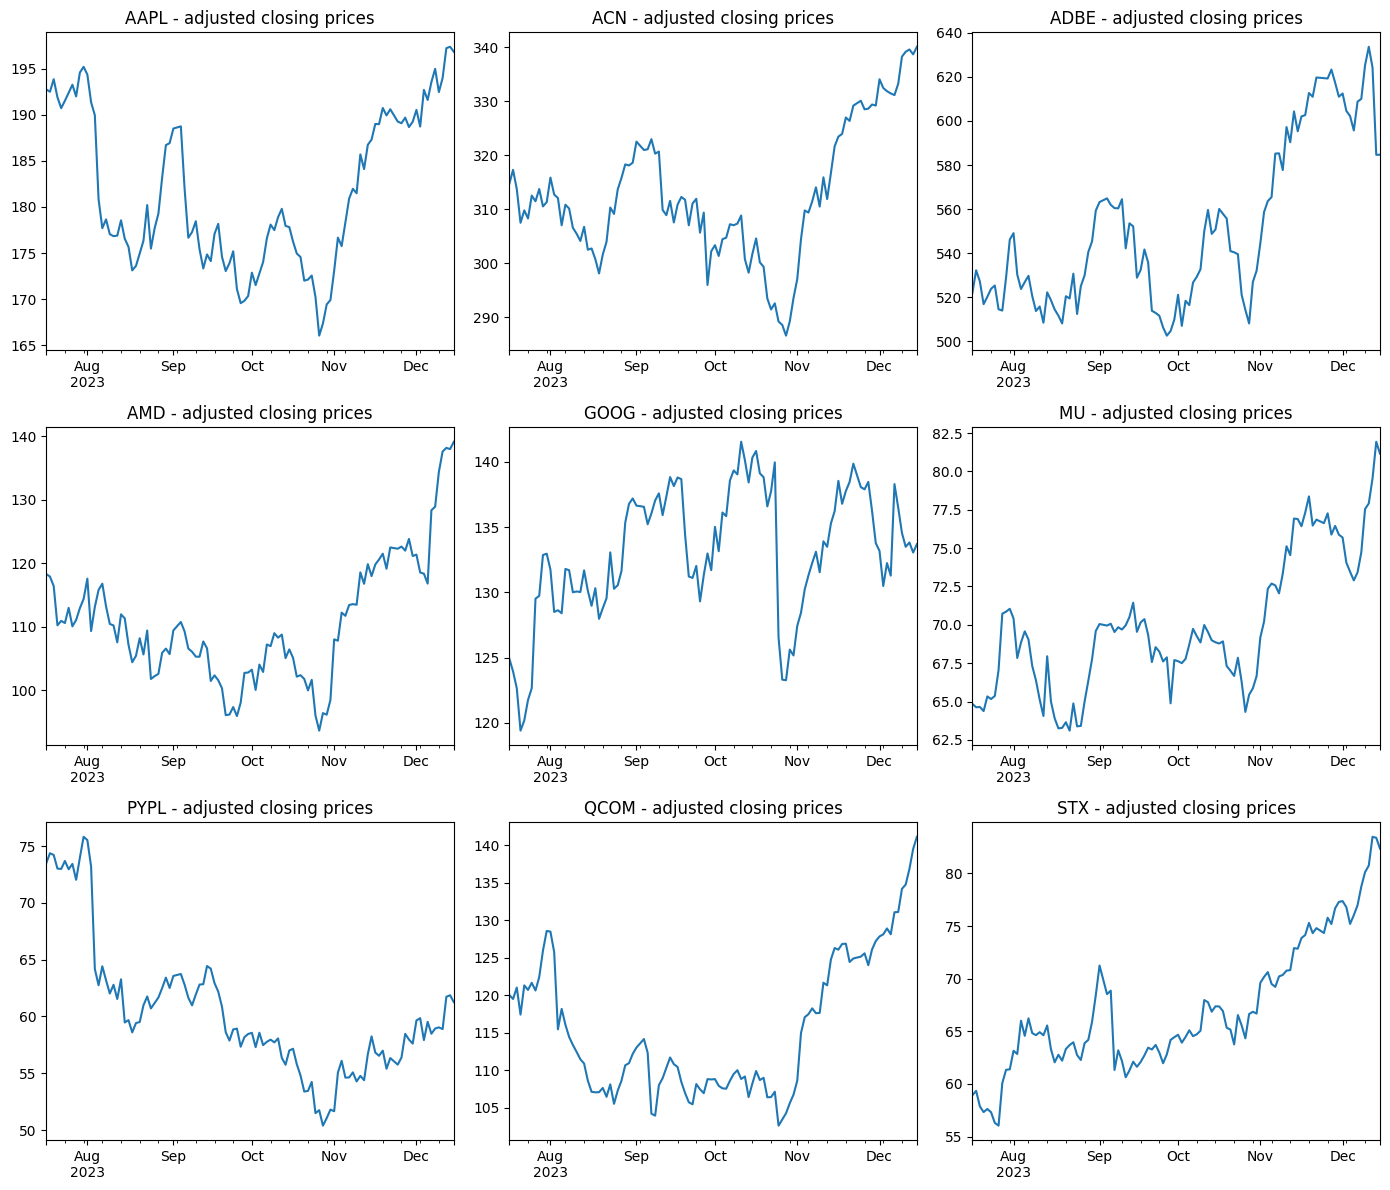

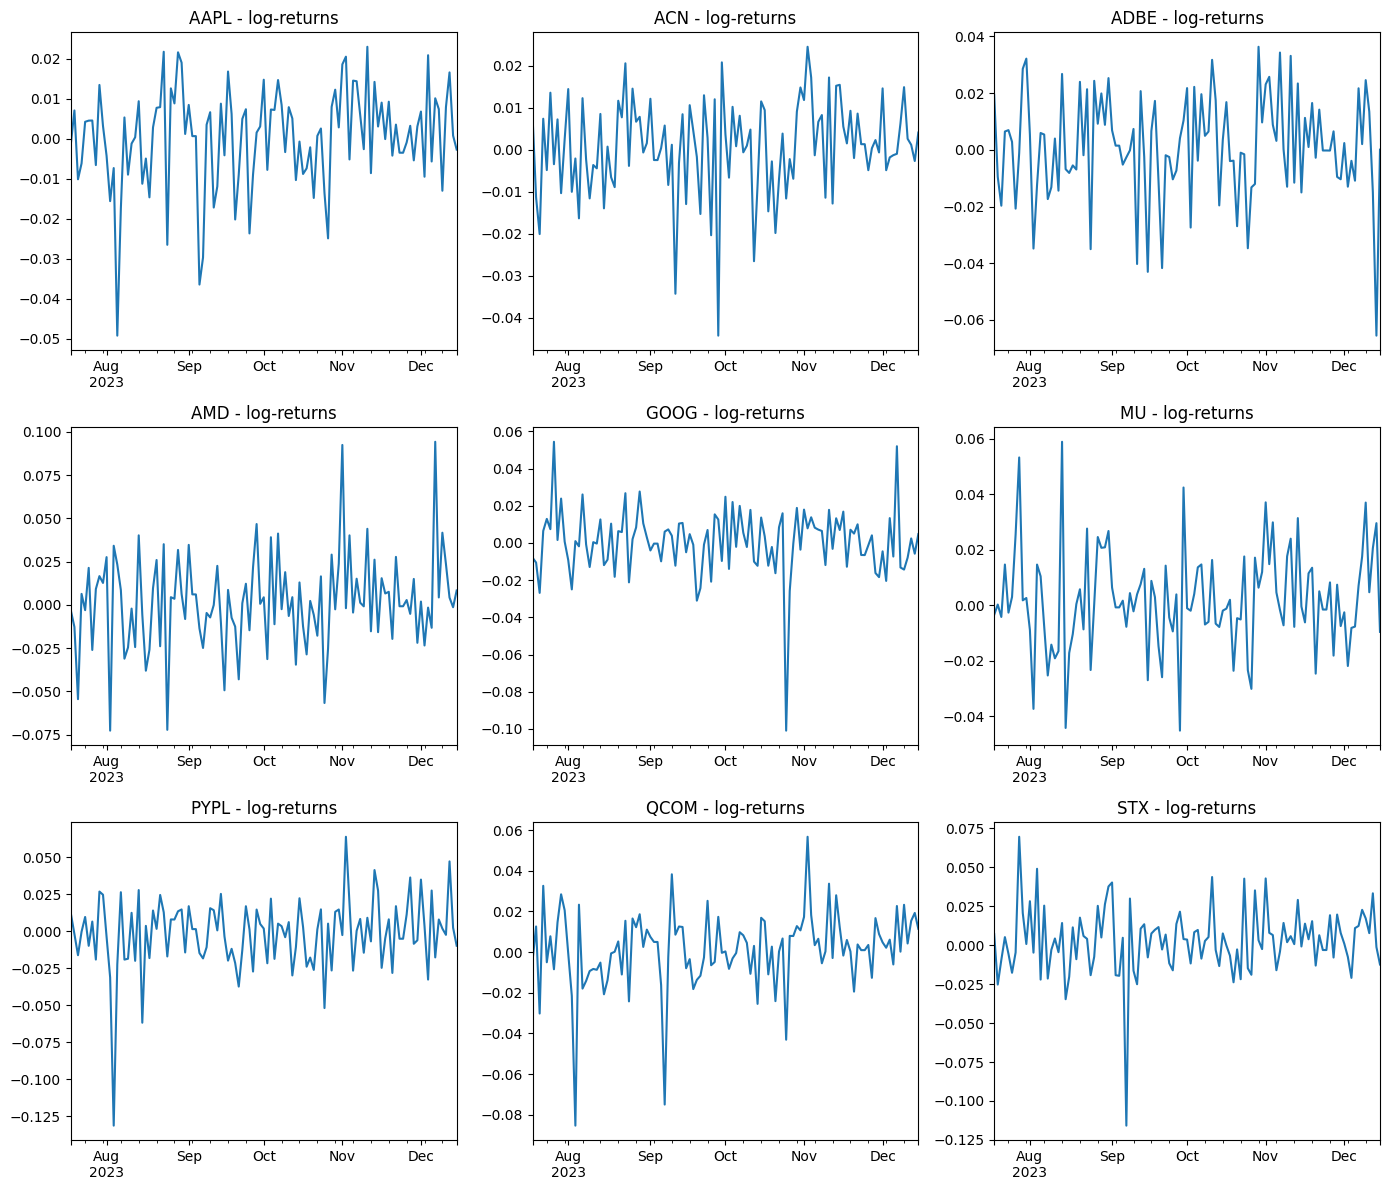

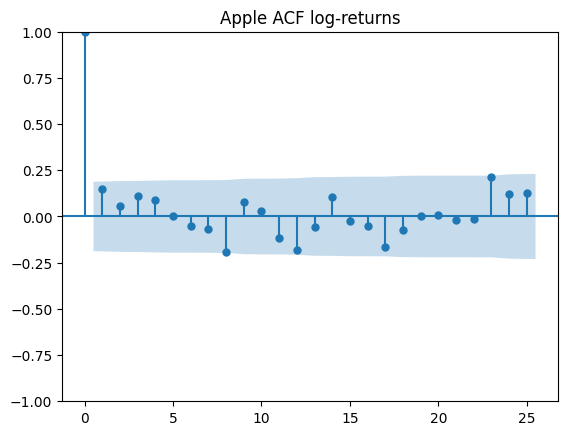

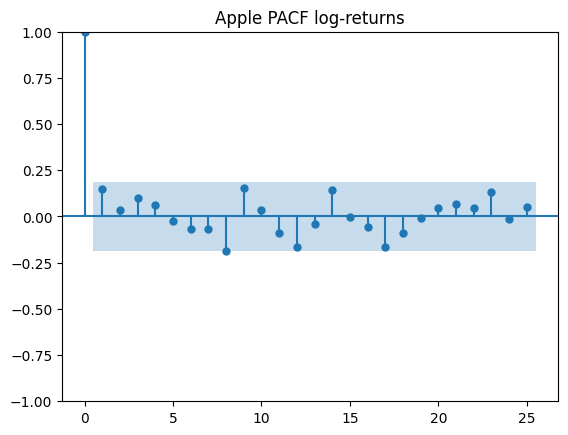

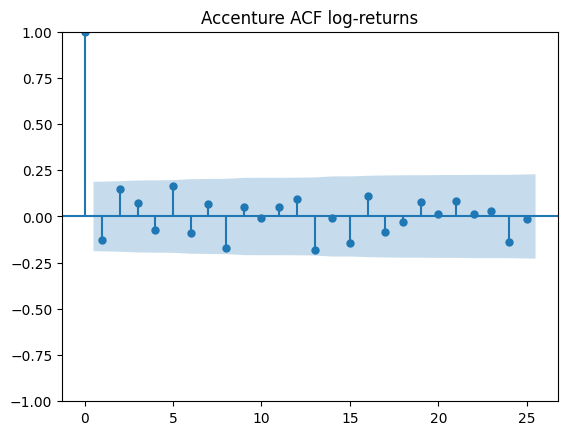

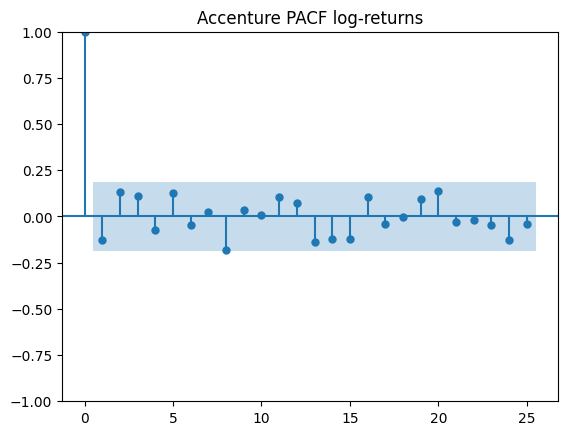

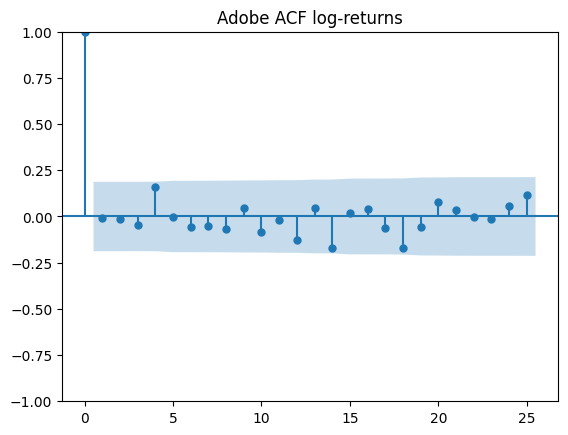

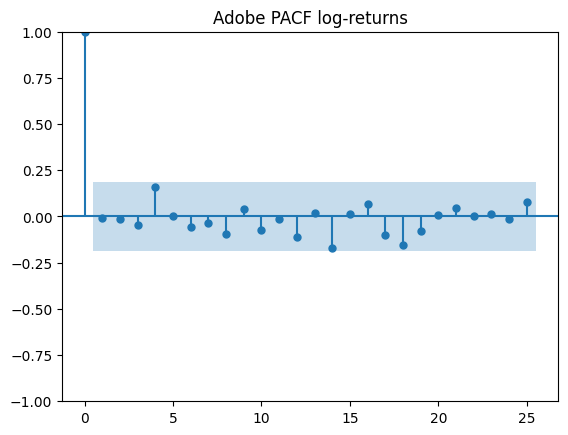

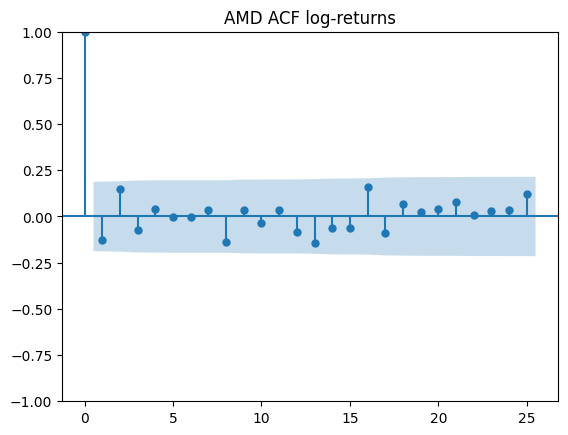

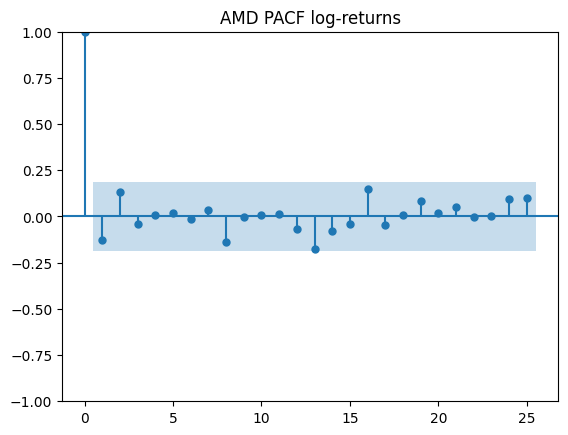

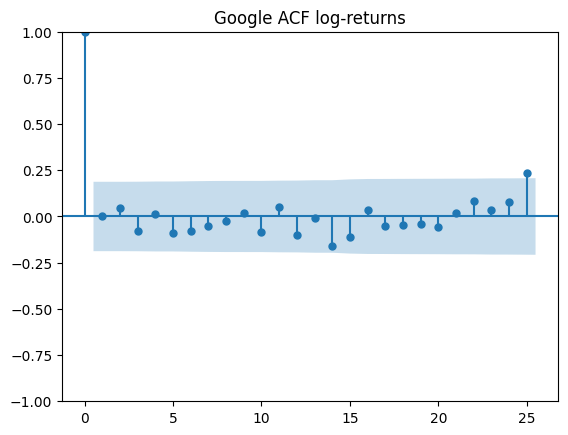

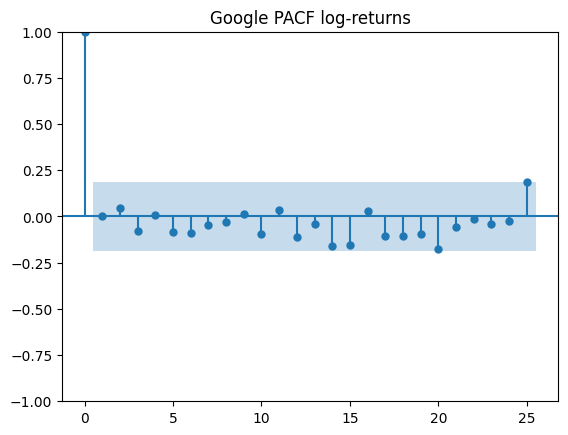

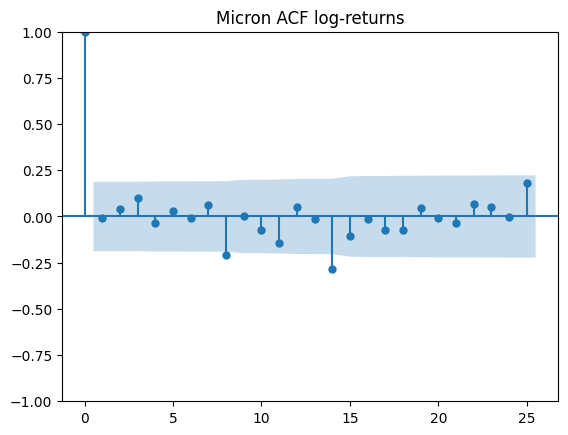

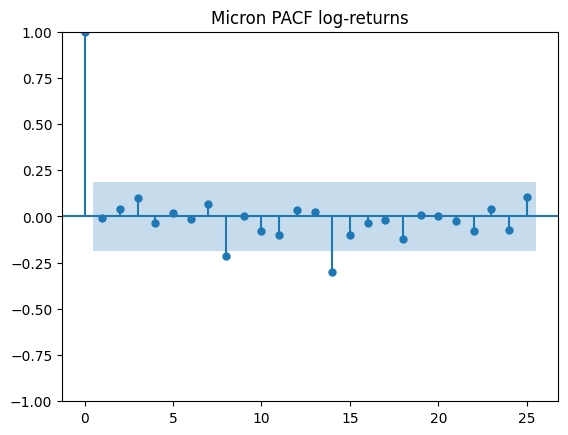

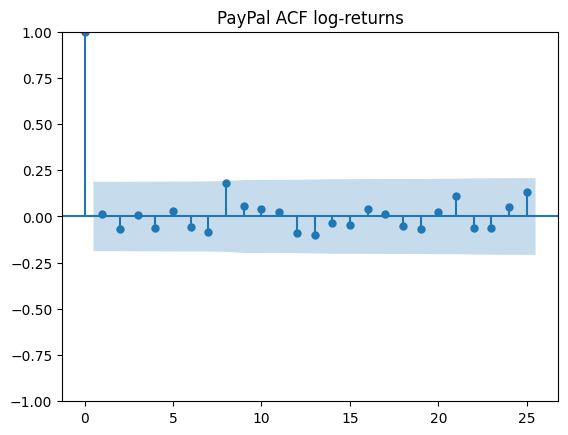

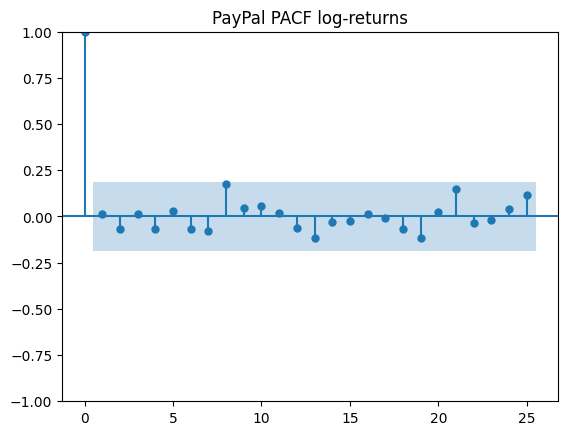

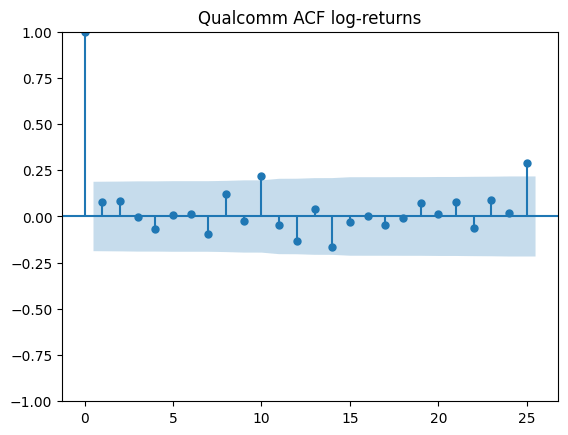

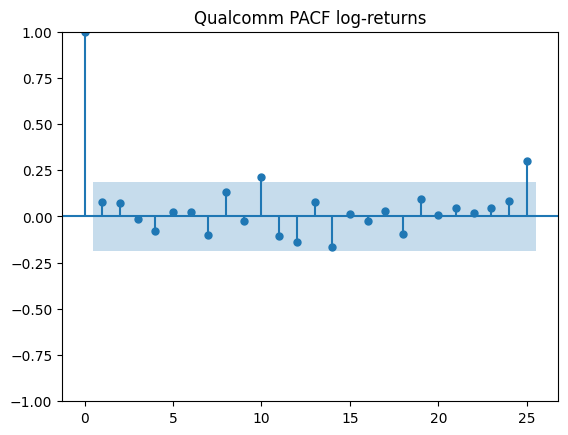

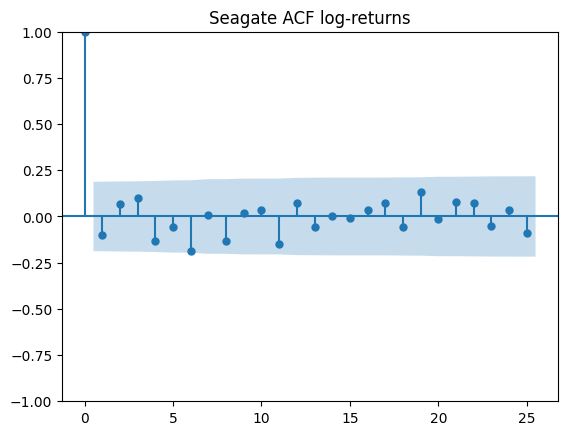

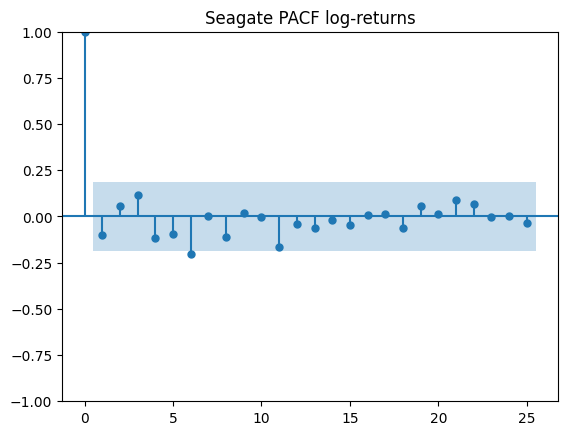

In [1]:
#This code includes the exploration/visualization of the financial time series data (visualization of the adjusted closing prices
#and the corresponding logarithmic returns). Furthermore, the code tests the adjusted closing prices and
#the log returns for stationarity and features the plots of the autocorrelation as well as
#the partial autocorrelation coefficients of the time series. Lastly, this file provides information about the optimal
#orders (according to the AIC) for ARIMA & VAR and analyzes the residuals of the models selected (note that the selected models
#are not necessarily the optimal ones, as suggested by pmdarima and statsmodels; ARIMA 0, 1, 0 without intercept does not provide any information about
#future price movements = random walk without drift/naive forecast). Further, the code provides information about the parameters of
#the selected models (coefficients and intercepts).

#Import all necessary libraries

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install pmdarima
import pmdarima as pm
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox

#Download the dataset
#Use the code below (commented out) if the download should happen directly through Yahoo Finance

'''
ticker_list = ['AAPL', 'ACN', 'ADBE',
              'AMD', 'GOOG', 'MU',
              'PYPL', 'QCOM', 'STX']
stock_prices = yf.download(ticker_list, start = '2023-07-17', end = '2023-12-16', interval = '1d')['Adj Close']
'''

stock_prices = pd.read_csv('https://github.com/sch-wm/time_series/raw/main/yfinance_stock_prices_for_baselines.csv', index_col = 0)
stock_prices.index = pd.to_datetime(stock_prices.index)

#Inspect the data

stock_prices.head(10)
stock_prices.shape

#Preprocess the data (insert missing dates and remove the related nans through linear interpolation)

dates = pd.date_range(start = pd.to_datetime('2023-07-17').tz_localize("GMT+0") , end = pd.to_datetime('2023-12-16').tz_localize("GMT+0"), freq = 'B')
stock_prices = stock_prices.reindex(dates)
stock_prices.interpolate(inplace = True)

#Inspect the data

stock_prices.shape

#Use ln on the prices and then difference once to get log returns manually

log_stock_prices = np.log(stock_prices)
log_returns_stock_prices = log_stock_prices.diff()
log_returns_stock_prices.dropna(inplace = True)

#Plot the adjusted closing prices

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 12))
axes[0, 0].set_title('AAPL - adjusted closing prices')
print(stock_prices['AAPL'].plot(ax = axes[0, 0]))
axes[0, 1].set_title('ACN - adjusted closing prices')
print(stock_prices['ACN'].plot(ax = axes[0, 1]))
axes[0, 2].set_title('ADBE - adjusted closing prices')
print(stock_prices['ADBE'].plot(ax = axes[0, 2]))
axes[1, 0].set_title('AMD - adjusted closing prices')
print(stock_prices['AMD'].plot(ax = axes[1, 0]))
axes[1, 1].set_title('GOOG - adjusted closing prices')
print(stock_prices['GOOG'].plot(ax = axes[1, 1]))
axes[1, 2].set_title('MU - adjusted closing prices')
print(stock_prices['MU'].plot(ax = axes[1, 2]))
axes[2, 0].set_title('PYPL - adjusted closing prices')
print(stock_prices['PYPL'].plot(ax = axes[2, 0]))
axes[2, 1].set_title('QCOM - adjusted closing prices')
print(stock_prices['QCOM'].plot(ax = axes[2, 1]))
axes[2, 2].set_title('STX - adjusted closing prices')
print(stock_prices['STX'].plot(ax = axes[2, 2]))
plt.tight_layout()

#Check stationarity of the adjusted closing prices

number_assets = 9

for asset in range(number_assets):
  stock_prices_adf = adfuller(stock_prices.iloc[:100, asset].values)
  print('P-value for asset', asset, ':', stock_prices_adf[1])

#Plot the logarithmic returns

fig2, axes2 = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 12))
axes2[0, 0].set_title('AAPL - log-returns')
print(log_returns_stock_prices['AAPL'].plot(ax = axes2[0, 0]))
axes2[0, 1].set_title('ACN - log-returns')
print(log_returns_stock_prices['ACN'].plot(ax = axes2[0, 1]))
axes2[0, 2].set_title('ADBE - log-returns')
print(log_returns_stock_prices['ADBE'].plot(ax = axes2[0, 2]))
axes2[1, 0].set_title('AMD - log-returns')
print(log_returns_stock_prices['AMD'].plot(ax = axes2[1, 0]))
axes2[1, 1].set_title('GOOG - log-returns')
print(log_returns_stock_prices['GOOG'].plot(ax = axes2[1, 1]))
axes2[1, 2].set_title('MU - log-returns')
print(log_returns_stock_prices['MU'].plot(ax = axes2[1, 2]))
axes2[2, 0].set_title('PYPL - log-returns')
print(log_returns_stock_prices['PYPL'].plot(ax = axes2[2, 0]))
axes2[2, 1].set_title('QCOM - log-returns')
print(log_returns_stock_prices['QCOM'].plot(ax = axes2[2, 1]))
axes2[2, 2].set_title('STX - log-returns')
print(log_returns_stock_prices['STX'].plot(ax = axes2[2, 2]))
plt.tight_layout()

#Check stationarity of the logarithmic returns

for asset in range(number_assets):
  log_returns_stock_prices_adf = adfuller(log_returns_stock_prices.iloc[:99, asset].values)
  print('P-value for asset', asset, ':', log_returns_stock_prices_adf[1])

#Plot PACF (order p) & ACF (order q) of the logarithmic returns

print(plot_acf(log_returns_stock_prices['AAPL'], lags = 25, title = 'Apple ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['AAPL'], lags = 25, title = 'Apple PACF log-returns'))
print(plot_acf(log_returns_stock_prices['ACN'], lags = 25, title = 'Accenture ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['ACN'], lags = 25, title = 'Accenture PACF log-returns'))
print(plot_acf(log_returns_stock_prices['ADBE'], lags = 25, title = 'Adobe ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['ADBE'], lags = 25, title = 'Adobe PACF log-returns'))
print(plot_acf(log_returns_stock_prices['AMD'], lags = 25, title = 'AMD ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['AMD'], lags = 25, title = 'AMD PACF log-returns'))
print(plot_acf(log_returns_stock_prices['GOOG'], lags = 25, title = 'Google ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['GOOG'], lags = 25, title = 'Google PACF log-returns'))
print(plot_acf(log_returns_stock_prices['MU'], lags = 25, title = 'Micron ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['MU'], lags = 25, title = 'Micron PACF log-returns'))
print(plot_acf(log_returns_stock_prices['PYPL'], lags = 25, title = 'PayPal ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['PYPL'], lags = 25, title = 'PayPal PACF log-returns'))
print(plot_acf(log_returns_stock_prices['QCOM'], lags = 25, title = 'Qualcomm ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['QCOM'], lags = 25, title = 'Qualcomm PACF log-returns'))
print(plot_acf(log_returns_stock_prices['STX'], lags = 25, title = 'Seagate ACF log-returns'))
print(plot_pacf(log_returns_stock_prices['STX'], lags = 25, title = 'Seagate PACF log-returns'))

#Model selection, summary of the possible ARIMA models and residual check
#The ARIMA function suggests using ARIMA 0, 1, 0 for all assets ; no intercept (random walk),
#as this model provides the lowest AIC
#However, using random walk forecasts will not give any information on the price movements
#Therefore, the models with the second lowest AIC will be employed
#Seven out of nine forecasts will involve using ARIMA 0, 1, 0; with intercept (random walk with drift)
#and two forecasts will involve using ARIMA 1, 1, 0; with intercept (differencing + autoregression with lag of 1)

for asset in range(number_assets):
  ARIMA_model = pm.auto_arima(log_stock_prices.iloc[:100, asset], start_p = 0, d = 1, start_q = 0, max_p = 5, max_q = 5,
                              seasonal = False, stepwise = True, suppress_warnings = True, trace = True, error_action = 'ignore')
  print(ARIMA_model.summary())
for asset in range(number_assets):
  if asset == 0 or asset == 3:
    ARIMA_model = pm.ARIMA(order = (1, 1, 0), with_intercept = True).fit(y = log_stock_prices.iloc[:100, asset])
  else:
    ARIMA_model = pm.ARIMA(order = (0, 1, 0), with_intercept = True).fit(y = log_stock_prices.iloc[:100, asset])
  print(ARIMA_model.params(), 'ARIMA model parameters')
  print(acorr_ljungbox(ARIMA_model.resid(), lags = 10), 'Ljung-Box test ARIMA', asset)

#Model selection, summary of VAR model for each asset and residual check

max_order_VAR = 5
VAR_model_before_fit = VAR(log_returns_stock_prices.iloc[:99, :])
for order in range(max_order_VAR + 1):
  VAR_model = VAR_model_before_fit.fit(order)
  print('order:', order)
  print('AIC:', VAR_model.aic)
VAR_model_before_fit = VAR(log_returns_stock_prices.iloc[:99, :])
VAR_model = VAR_model_before_fit.fit(maxlags = 1)
VAR_model_residuals = VAR_model.resid
#print(VAR_model_residuals.shape)
for asset in range(number_assets):
  print(acorr_ljungbox(VAR_model_residuals.iloc[:, asset], lags = 10), 'Ljung-Box test VAR', asset)
print(VAR_model.summary(), 'VAR model parameters')